# Stock price
- Collect stock price from internet
- compare two stock price 
- In this file, I compare kakao and naver stocks.

In [2]:
import pandas as pd
import urllib3,certifi
import matplotlib.pyplot as plt
import urllib
import time
import numpy as np
from itertools import repeat
import tqdm

from multiprocessing import Pool # Pool import하기
import numpy as np
from multiprocessing import cpu_count

from urllib.request import urlopen
from bs4 import BeautifulSoup

from stock_price import stock

In [3]:
st = stock()

In [4]:
st.get_code('카카오')

'035720'

In [5]:
df = st.get_stock_parallel('카카오', n_pages=10)

stock code is :  035720
Maximum page:  174


100%|██████████| 10/10 [00:00<00:00, 16474.09it/s]


In [6]:
df.sample(6)

,end_price,diff,diff_ratio,volume,institution,foriegn,foriegn_stocks,foriegn_occupy
date,,,,,,,,
2018-11-22,106500,1000,-0.93,143409,33336,-11779,20255004.0,24.290001
2018-09-05,121000,1000,-0.82,215419,-53534,39286,19400458.0,25.430000
2018-11-13,101500,500,0.50,278476,38054,-3511,20543266.0,24.639999
2018-11-29,112000,0,0.00,263008,2555,64719,20632936.0,24.740000
2018-09-12,120000,3500,3.00,344739,76318,-29821,19313054.0,25.309999
2019-01-30,99900,2100,-2.06,565397,-137852,-74090,20170217.0,24.190001


In [7]:
coms = ['삼성전자', 'SK하이닉스', '카카오', 'NAVER', 'SK', '아모레퍼시픽']

In [8]:
stockdict = {}
for com in coms:
    stockdict[com] = st.get_stock_parallel(com, 100)
#    dfs.append(get_stock_parallel(com, 100))

stock code is :  005930
Maximum page:  175


100%|██████████| 100/100 [00:00<00:00, 152686.71it/s]


stock code is :  000660
Maximum page:  175


100%|██████████| 100/100 [00:00<00:00, 292693.93it/s]


stock code is :  035720
Maximum page:  174


100%|██████████| 100/100 [00:00<00:00, 299165.76it/s]


stock code is :  035420
Maximum page:  175


100%|██████████| 100/100 [00:00<00:00, 277034.61it/s]


stock code is :  034730
Maximum page:  115


100%|██████████| 100/100 [00:00<00:00, 120180.63it/s]


stock code is :  090430
Maximum page:  157


100%|██████████| 100/100 [00:00<00:00, 199633.70it/s]


삼성전자


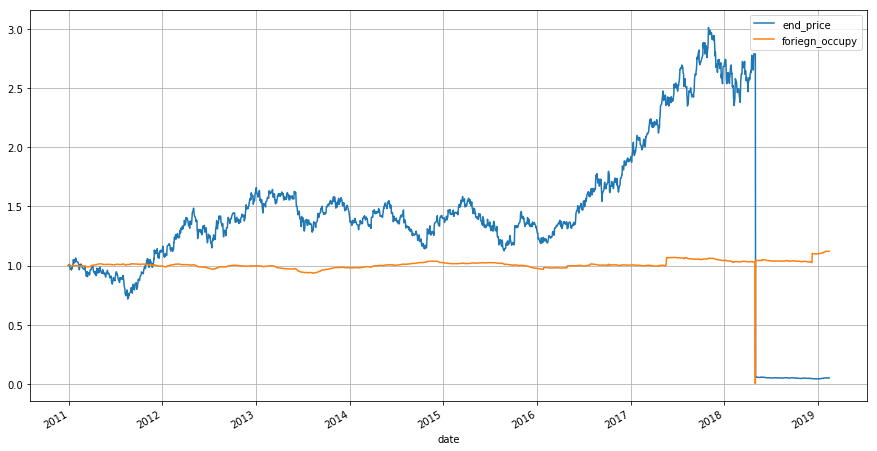

SK하이닉스


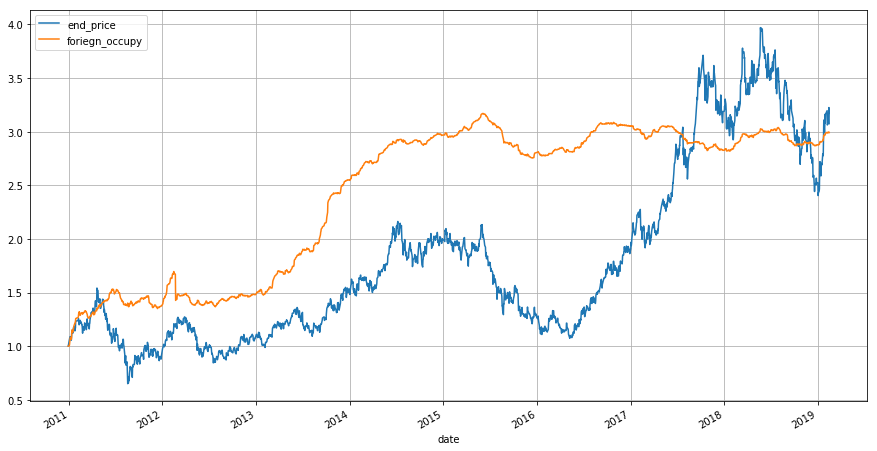

카카오


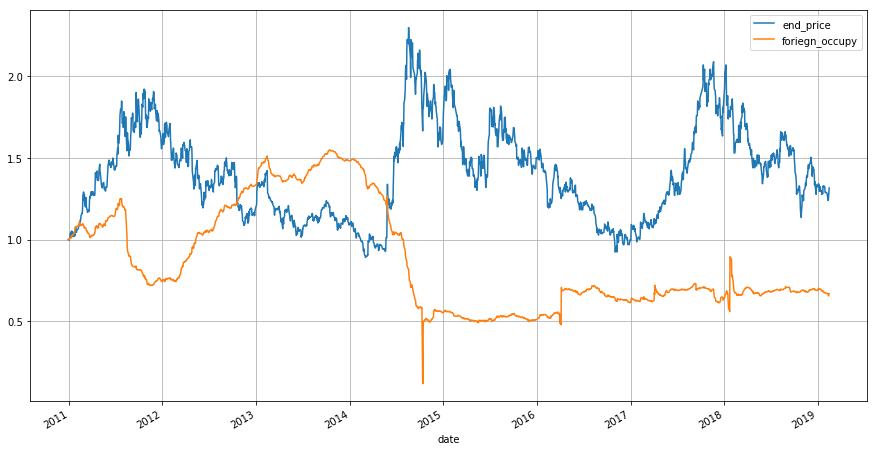

NAVER


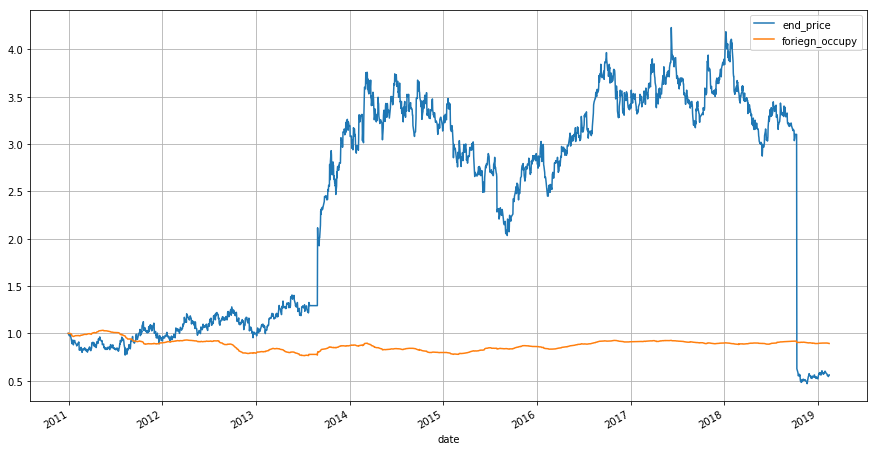

SK


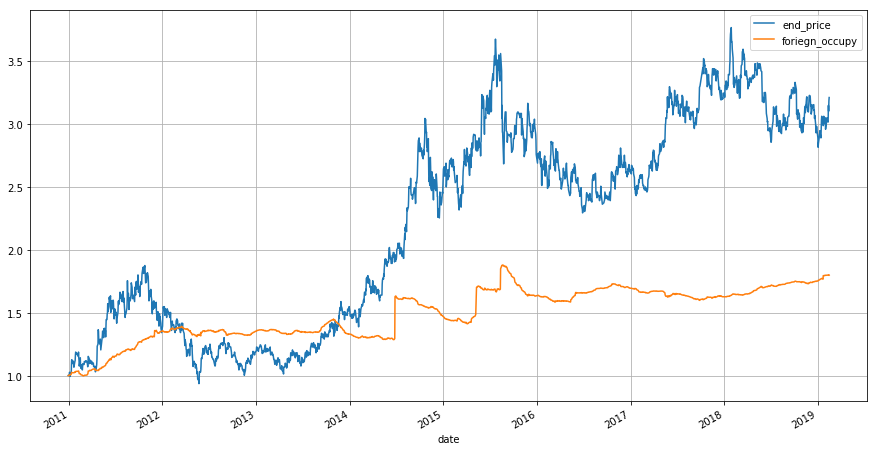

아모레퍼시픽


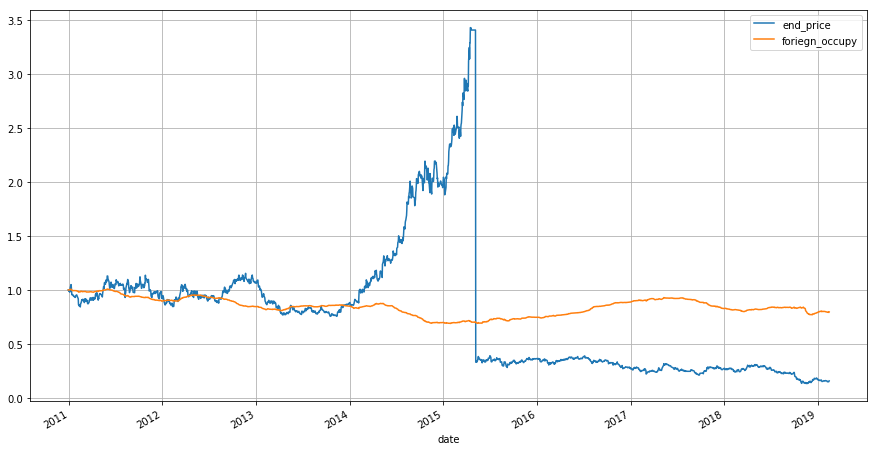

In [9]:
for com,  df in stockdict.items():
    print(com)
    df_idx = df.apply(lambda x: x / x[0])

    df_idx[['end_price', 'foriegn_occupy', ]].plot(grid=True, figsize = (15, 8))
    plt.show()